# Classification des images 

## Resnet :

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### Couleur

In [67]:
img = image.load_img("data/glasses_kpi_extraction/testdata/couleur/AmberTortoise/image-120.jpg")

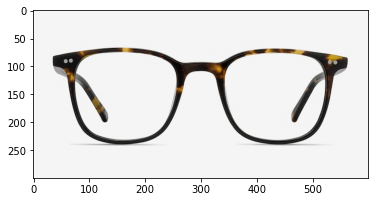

In [68]:
plt.imshow(img)

In [11]:
cv2.imread("data/glasses_kpi_extraction/testdata/couleur/AmberTortoise/image-120.jpg").shape

(300, 600, 3)

In [12]:
img_height,img_witdth=(224,224)
batch_size=32

train_data_dir=r'data/glasses_kpi_extraction/traindata/couleur/'
test_data_dir=r'data/glasses_kpi_extraction/testdata/couleur/'
valid_data_dir=r'data/glasses_kpi_extraction/validdata/couleur/'

In [13]:
train_datagen =ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.4)
                                  
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='training')

valid_generator =train_datagen.flow_from_directory(valid_data_dir,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='validation')




Found 1062 images belonging to 77 classes.
Found 74 images belonging to 77 classes.


In [14]:
test_generator =train_datagen.flow_from_directory(test_data_dir,target_size=(img_height,img_witdth)
                                        ,batch_size=1,
                                        class_mode ='categorical',
                                        subset='validation')


Found 122 images belonging to 77 classes.


In [15]:
x,y= test_generator.next()
x.shape

(1, 224, 224, 3)

In [16]:
train_generator.num_classes

77

In [17]:
base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=10)

Epoch 1/10
34/34 [==============================] - 165s 5s/step - loss: 2.4986 - accuracy: 0.4567
Epoch 2/10
34/34 [==============================] - 154s 4s/step - loss: 0.8744 - accuracy: 0.7731
Epoch 3/10
34/34 [==============================] - 169s 5s/step - loss: 0.5232 - accuracy: 0.8559
Epoch 4/10
34/34 [==============================] - 178s 5s/step - loss: 0.3233 - accuracy: 0.9105
Epoch 5/10
34/34 [==============================] - 167s 5s/step - loss: 0.1969 - accuracy: 0.9548
Epoch 6/10
34/34 [==============================] - 150s 4s/step - loss: 0.1569 - accuracy: 0.9567
Epoch 7/10
34/34 [==============================] - 139s 4s/step - loss: 0.1007 - accuracy: 0.9793
Epoch 8/10
34/34 [==============================] - 136s 4s/step - loss: 0.0992 - accuracy: 0.9708
Epoch 9/10
34/34 [==============================] - 144s 4s/step - loss: 0.1116 - accuracy: 0.9736
Epoch 10/10
34/34 [==============================] - 131s 4s/step - loss: 0.0883 - accuracy: 0.9802


In [18]:
test_loss,test_acc =model.evaluate(test_generator ,verbose=2)
print('\nTest accuracy :',test_acc)

122/122 - 23s - loss: 0.0698 - accuracy: 0.9918 - 23s/epoch - 185ms/step

Test accuracy : 0.9918032884597778


In [19]:
L=['Golden', 'Matte Black', 'Gray Brown', 'Noir', 'Matte Tortoise',
       'Or rose', 'Transparent', 'Clear Brown', 'Black Silver',
       'Mellow Yellow', 'Warm Tortoise', 'Café', 'Matte Black/Golden ',
       'Écailles', 'Argenté', 'Bleu', 'Rainbow', 'Amber Tortoise',
       'Violet', 'Bleu marine ', 'Matte Clear', 'Écaille ivoire',
       'Navy &amp; Gold', 'Fleuries', 'Orange', 'Jaune', 'Rouge',
       'Clear Orange', 'Gunmetal', 'Dark Red', 'Clear Melon', 'Léopard',
       'Ivory/Tortoise', 'Tortoise Green', 'Clear Purple', 'Champagne',
       'Glitter Rose Gold', 'Brown/Tortoise', 'Red &amp; Gold', 'Vert',
       'Rose', 'Clear &amp; Silver', 'Clear Pink', 'Teal',
       'Mulberry Tortoise', 'Purple Pink', 'Doré', 'Cassis',
       'Blue Striped', 'Bronze', 'Clear Gray', 'Clear Blue',
       'Light Tortoise', ' Light Golden ', 'Matte Black Orange', ' Navy ',
       'Matte Navy', 'Black Tortoise', ' Clear Silver ', ' Matte Silver ',
       'Matte Gray', 'Atlantic Blue &amp; Warm Tortoise', 'Brown Striped',
       'Warm Tortoise &amp; Basalt', 'Black &amp; Wood', 'Marron',
       'Floral Tortoise', 'Lavender', 'Clear Teal', 'Matte Brown',
       'Burgundy', 'Light Blue', 'Mint Frost', 'Black Floral',
       'Red Tortoise', 'Black Pink', 'Beige Purple', 'Coral Tortoise']

In [25]:
L1=[]
for i in L:
    L1.append(i.replace(" ", ""))
L1.sort()

In [26]:
L1

['AmberTortoise',
 'Argenté',
 'AtlanticBlue&amp;WarmTortoise',
 'BeigePurple',
 'Black&amp;Wood',
 'BlackFloral',
 'BlackPink',
 'BlackSilver',
 'BlackTortoise',
 'Bleu',
 'Bleumarine',
 'BlueStriped',
 'Bronze',
 'Brown/Tortoise',
 'BrownStriped',
 'Burgundy',
 'Café',
 'Cassis',
 'Champagne',
 'Clear&amp;Silver',
 'ClearBlue',
 'ClearBrown',
 'ClearGray',
 'ClearMelon',
 'ClearOrange',
 'ClearPink',
 'ClearPurple',
 'ClearSilver',
 'ClearTeal',
 'CoralTortoise',
 'DarkRed',
 'Doré',
 'Fleuries',
 'FloralTortoise',
 'GlitterRoseGold',
 'Golden',
 'GrayBrown',
 'Gunmetal',
 'Ivory/Tortoise',
 'Jaune',
 'Lavender',
 'LightBlue',
 'LightGolden',
 'LightTortoise',
 'Léopard',
 'Marron',
 'MatteBlack',
 'MatteBlack/Golden',
 'MatteBlackOrange',
 'MatteBrown',
 'MatteClear',
 'MatteGray',
 'MatteNavy',
 'MatteSilver',
 'MatteTortoise',
 'MellowYellow',
 'MintFrost',
 'MulberryTortoise',
 'Navy',
 'Navy&amp;Gold',
 'Noir',
 'Orange',
 'Orrose',
 'PurplePink',
 'Rainbow',
 'Red&amp;Gold',
 '

1/1 [==============================] - 0s 139ms/step
Bronze


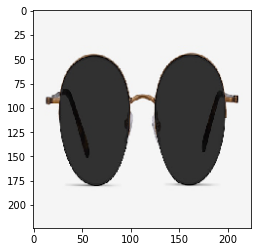

In [27]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
#load saved model
img_path ='data/glasses_kpi_extraction/traindata/couleur/Bronze/image-31.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = L1
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

In [28]:
filename='savedModelCouleur'
model.save(filename)

INFO:tensorflow:Assets written to: savedModelCouleur\assets


INFO:tensorflow:Assets written to: savedModelCouleur\assets


### Forme :

In [29]:
img_height,img_witdth=(224,224)
batch_size=32

train_data_dir_2=r'data/glasses_kpi_extraction/traindata/forme/'
test_data_dir_2=r'data/glasses_kpi_extraction/testdata/forme/'
valid_data_dir_2=r'data/glasses_kpi_extraction/validdata/forme/'

In [30]:
                                
train_generator_2 =train_datagen.flow_from_directory(train_data_dir_2,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='training')

valid_generator_2 =train_datagen.flow_from_directory(valid_data_dir_2,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='validation')

Found 877 images belonging to 9 classes.
Found 128 images belonging to 9 classes.


In [31]:
test_generator_2 =train_datagen.flow_from_directory(test_data_dir_2,target_size=(img_height,img_witdth)
                                        ,batch_size=1,
                                        class_mode ='categorical',
                                        subset='validation')


Found 134 images belonging to 9 classes.


In [32]:
train_generator_2.num_classes

9

In [33]:
base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator_2.num_classes,activation='softmax')(x)
model1= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(train_generator_2,epochs=10)

Epoch 1/10
28/28 [==============================] - 85s 3s/step - loss: 1.5984 - accuracy: 0.5758
Epoch 2/10
28/28 [==============================] - 84s 3s/step - loss: 0.5181 - accuracy: 0.8096
Epoch 3/10
28/28 [==============================] - 83s 3s/step - loss: 0.3244 - accuracy: 0.8985
Epoch 4/10
28/28 [==============================] - 84s 3s/step - loss: 0.2278 - accuracy: 0.9339
Epoch 5/10
28/28 [==============================] - 83s 3s/step - loss: 0.1529 - accuracy: 0.9647
Epoch 6/10
28/28 [==============================] - 83s 3s/step - loss: 0.1353 - accuracy: 0.9624
Epoch 7/10
28/28 [==============================] - 84s 3s/step - loss: 0.0933 - accuracy: 0.9806
Epoch 8/10
28/28 [==============================] - 90s 3s/step - loss: 0.0779 - accuracy: 0.9852
Epoch 9/10
28/28 [==============================] - 94s 3s/step - loss: 0.0818 - accuracy: 0.9806
Epoch 10/10
28/28 [==============================] - 96s 3s/step - loss: 0.0933 - accuracy: 0.9761


In [35]:
test_loss,test_acc =model1.evaluate(test_generator_2 ,verbose=2)
print('\nTest accuracy :',test_acc)

134/134 - 15s - loss: 0.0588 - accuracy: 0.9776 - 15s/epoch - 110ms/step

Test accuracy : 0.9776119589805603


In [36]:
F=['Visagerond',
 'Rectangulaire',
 'Visagecarré',
 'Geometric',
 'Ovale',
 'Browline',
 'Cœur',
 'CatEye',
 'Aviateur']

In [37]:
F1=[]
for i in F:
    F1.append(i.replace(" ", ""))
F1.sort()
F1

['Aviateur',
 'Browline',
 'CatEye',
 'Cœur',
 'Geometric',
 'Ovale',
 'Rectangulaire',
 'Visagecarré',
 'Visagerond']

1/1 [==============================] - 1s 1s/step
Cœur


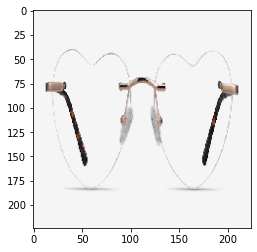

In [38]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
#load saved model
img_path ='data/glasses_kpi_extraction/traindata/forme/Cœur/image-1022.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model1.predict(x)
# create a list containing the class labels
class_labels = F1
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

In [39]:
filename='savedModelForme'
model1.save(filename)

INFO:tensorflow:Assets written to: savedModelForme\assets


INFO:tensorflow:Assets written to: savedModelForme\assets


### materiaux :

In [40]:
img_height,img_witdth=(224,224)
batch_size=32
train_data_dir_3=r'data/glasses_kpi_extraction/traindata/materiau/'
test_data_dir_3=r'data/glasses_kpi_extraction/testdata/materiau/'
valid_data_dir_3=r'data/glasses_kpi_extraction/validdata/materiau/'

In [41]:
train_generator_3 =train_datagen.flow_from_directory(train_data_dir_3,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='training')

valid_generator_3 =train_datagen.flow_from_directory(valid_data_dir_3,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='validation')

Found 669 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [42]:
test_generator_3 =train_datagen.flow_from_directory(test_data_dir_3,target_size=(img_height,img_witdth)
                                        ,batch_size=1,
                                        class_mode ='categorical',
                                        subset='validation')


Found 192 images belonging to 4 classes.


In [43]:
train_generator_3.num_classes

4

In [44]:
base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator_3.num_classes,activation='softmax')(x)
model2= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(train_generator_3,epochs=10)

Epoch 1/10
21/21 [==============================] - 63s 3s/step - loss: 1.3423 - accuracy: 0.5845
Epoch 2/10
21/21 [==============================] - 60s 3s/step - loss: 0.3869 - accuracy: 0.8685
Epoch 3/10
21/21 [==============================] - 61s 3s/step - loss: 0.2772 - accuracy: 0.9043
Epoch 4/10
21/21 [==============================] - 59s 3s/step - loss: 0.2158 - accuracy: 0.9268
Epoch 5/10
21/21 [==============================] - 59s 3s/step - loss: 0.2158 - accuracy: 0.9223
Epoch 6/10
21/21 [==============================] - 60s 3s/step - loss: 0.1970 - accuracy: 0.9342
Epoch 7/10
21/21 [==============================] - 60s 3s/step - loss: 0.1077 - accuracy: 0.9671
Epoch 8/10
21/21 [==============================] - 69s 3s/step - loss: 0.0877 - accuracy: 0.9716
Epoch 9/10
21/21 [==============================] - 69s 3s/step - loss: 0.0698 - accuracy: 0.9791
Epoch 10/10
21/21 [==============================] - 56s 3s/step - loss: 0.0651 - accuracy: 0.9821


base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator_2.num_classes,activation='softmax')(x)
model= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator_2,epochs=10)### monture :

In [45]:
test_loss,test_acc =model2.evaluate(test_generator_3 ,verbose=2)
print('\nTest accuracy :',test_acc)

192/192 - 31s - loss: 0.0854 - accuracy: 0.9792 - 31s/epoch - 162ms/step

Test accuracy : 0.9791666865348816


In [46]:
M=['metal',
 'plastic',
 'acetate',
 'acetate-metal',
 ]

In [47]:
M1=[]
for i in M:
    M1.append(i.replace(" ", ""))
M1.sort()
M1

['acetate', 'acetate-metal', 'metal', 'plastic']

1/1 [==============================] - 1s 963ms/step
metal


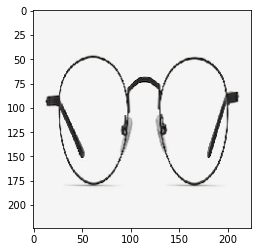

In [48]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
#load saved model
img_path ='img.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model2.predict(x)
# create a list containing the class labels
class_labels = M1
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

In [49]:
filename='savedModelMateriau'
model2.save(filename)

INFO:tensorflow:Assets written to: savedModelMateriau\assets


INFO:tensorflow:Assets written to: savedModelMateriau\assets


### Sexe :

In [50]:
img_height,img_witdth=(224,224)
batch_size=32

train_data_dir_4=r'data/glasses_kpi_extraction/traindata/sexe/'
test_data_dir_4=r'data/glasses_kpi_extraction/testdata/sexe/'
valid_data_dir_4=r'data/glasses_kpi_extraction/validdata/sexe/'

In [51]:
train_generator_4 =train_datagen.flow_from_directory(train_data_dir_4,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='training')

valid_generator_4 =train_datagen.flow_from_directory(valid_data_dir_4,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='validation')

Found 931 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [52]:
test_generator_4 =train_datagen.flow_from_directory(test_data_dir_4,target_size=(img_height,img_witdth)
                                        ,batch_size=1,
                                        class_mode ='categorical',
                                        subset='validation')

Found 124 images belonging to 2 classes.


In [53]:
train_generator_4.num_classes

2

In [54]:
base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator_4.num_classes,activation='softmax')(x)
model3= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(train_generator_4,epochs=10)

Epoch 1/10
30/30 [==============================] - 113s 4s/step - loss: 1.6255 - accuracy: 0.5435
Epoch 2/10
30/30 [==============================] - 112s 4s/step - loss: 0.6493 - accuracy: 0.6079
Epoch 3/10
30/30 [==============================] - 105s 4s/step - loss: 0.6510 - accuracy: 0.6176
Epoch 4/10
30/30 [==============================] - 107s 4s/step - loss: 0.6011 - accuracy: 0.6713
Epoch 5/10
30/30 [==============================] - 156s 5s/step - loss: 0.6003 - accuracy: 0.6563
Epoch 6/10
30/30 [==============================] - 185s 6s/step - loss: 0.5895 - accuracy: 0.6660
Epoch 7/10
30/30 [==============================] - 163s 5s/step - loss: 0.5617 - accuracy: 0.7025
Epoch 8/10
30/30 [==============================] - 159s 5s/step - loss: 0.5357 - accuracy: 0.7089
Epoch 9/10
30/30 [==============================] - 168s 6s/step - loss: 0.5420 - accuracy: 0.7143
Epoch 10/10
30/30 [==============================] - 142s 5s/step - loss: 0.5450 - accuracy: 0.6799


In [55]:
T=['Femme','Homme']

1/1 [==============================] - 1s 1s/step
Femme


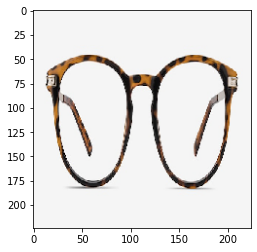

In [56]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
#load saved model
img_path ='data/glasses_kpi_extraction/traindata/sexe/Femme/image-125.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model3.predict(x)
# create a list containing the class labels
class_labels = T
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

In [57]:
filename='savedModelSexe'
model3.save(filename)

INFO:tensorflow:Assets written to: savedModelSexe\assets


INFO:tensorflow:Assets written to: savedModelSexe\assets


### Type :

In [58]:
img_height,img_witdth=(224,224)
batch_size=32

train_data_dir_5=r'data/glasses_kpi_extraction/traindata/type/'
test_data_dir_5=r'data/glasses_kpi_extraction/testdata/type/'
valid_data_dir_5=r'data/glasses_kpi_extraction/validdata/type/'

In [59]:
train_generator_5 =train_datagen.flow_from_directory(train_data_dir_5,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='training')

valid_generator_5 =train_datagen.flow_from_directory(valid_data_dir_5,target_size=(img_height,img_witdth)
                                        ,batch_size=batch_size,
                                        class_mode ='categorical',
                                        subset='validation')

Found 371 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [60]:
test_generator_5=train_datagen.flow_from_directory(test_data_dir_5,target_size=(img_height,img_witdth)
                                        ,batch_size=1,
                                        class_mode ='categorical',
                                        subset='validation')

Found 40 images belonging to 2 classes.


In [62]:
train_generator_5.num_classes

2

In [63]:
base_model = ResNet50(include_top = False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions=Dense(train_generator_5.num_classes,activation='softmax')(x)
model4= Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model4.fit(train_generator_5,epochs=10)

Epoch 1/10
12/12 [==============================] - 72s 6s/step - loss: 0.0981 - accuracy: 0.9218
Epoch 2/10
12/12 [==============================] - 64s 5s/step - loss: 4.8468e-04 - accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 55s 5s/step - loss: 5.2556e-06 - accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 55s 5s/step - loss: 2.0950e-07 - accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 58s 5s/step - loss: 1.0399e-06 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 55s 5s/step - loss: 1.9889e-07 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 57s 5s/step - loss: 8.9344e-07 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 57s 5s/step - loss: 1.1719e-06 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 55s 5s/step - loss: 8.1925e-07 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 66s 6s/step - loss: 6.2661e-05 - 

In [64]:
S=['Optique','Soleil']

1/1 [==============================] - 1s 1s/step
Optique


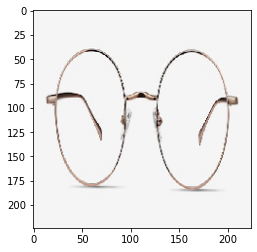

In [65]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
#load saved model
img_path ='data/glasses_kpi_extraction/traindata/type/Optique/image-660.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model4.predict(x)
# create a list containing the class labels
class_labels = S
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

In [66]:
filename='savedModelType'
model4.save(filename)

INFO:tensorflow:Assets written to: savedModelType\assets


INFO:tensorflow:Assets written to: savedModelType\assets


In [2]:
import keras
filename='savedModelCouleur'
model=keras.models.load_model(filename)

In [3]:
L=['Golden', 'Matte Black', 'Gray Brown', 'Noir', 'Matte Tortoise',
       'Or rose', 'Transparent', 'Clear Brown', 'Black Silver',
       'Mellow Yellow', 'Warm Tortoise', 'Café', 'Matte Black/Golden ',
       'Écailles', 'Argenté', 'Bleu', 'Rainbow', 'Amber Tortoise',
       'Violet', 'Bleu marine ', 'Matte Clear', 'Écaille ivoire',
       'Navy &amp; Gold', 'Fleuries', 'Orange', 'Jaune', 'Rouge',
       'Clear Orange', 'Gunmetal', 'Dark Red', 'Clear Melon', 'Léopard',
       'Ivory/Tortoise', 'Tortoise Green', 'Clear Purple', 'Champagne',
       'Glitter Rose Gold', 'Brown/Tortoise', 'Red &amp; Gold', 'Vert',
       'Rose', 'Clear &amp; Silver', 'Clear Pink', 'Teal',
       'Mulberry Tortoise', 'Purple Pink', 'Doré', 'Cassis',
       'Blue Striped', 'Bronze', 'Clear Gray', 'Clear Blue',
       'Light Tortoise', ' Light Golden ', 'Matte Black Orange', ' Navy ',
       'Matte Navy', 'Black Tortoise', ' Clear Silver ', ' Matte Silver ',
       'Matte Gray', 'Atlantic Blue &amp; Warm Tortoise', 'Brown Striped',
       'Warm Tortoise &amp; Basalt', 'Black &amp; Wood', 'Marron',
       'Floral Tortoise', 'Lavender', 'Clear Teal', 'Matte Brown',
       'Burgundy', 'Light Blue', 'Mint Frost', 'Black Floral',
       'Red Tortoise', 'Black Pink', 'Beige Purple', 'Coral Tortoise']

In [4]:
L1=[]
for i in L:
    L1.append(i.replace(" ", ""))
L1.sort()

1/1 [==============================] - 0s 94ms/step
Bronze


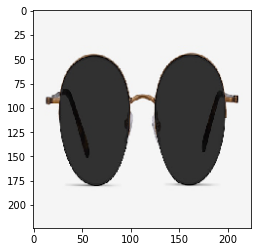

In [6]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import numpy as np
#load saved model
img_path ='data/glasses_kpi_extraction/traindata/couleur/Bronze/image-31.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = L1
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])